# Calculation of Value At Risk with Historical Method

### We start by importing the necessary libraries.

In [16]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf #yahoo finance
import matplotlib.pyplot as plt
from scipy.stats import norm

### We then set time for a certain number of days

In [17]:
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = years*365)

### We create a list of assets

In [18]:
assets = ['QQQ','GLD','SPY','VTI','BND'] 

### Daily adjusted prices:

In [19]:
adj_close_df = pd.DataFrame()

data = yf.download(assets, start = startDate, end  = endDate, auto_adjust=False)
adj_close_df = data['Adj Close']
print(adj_close_df)

[*********************100%***********************]  5 of 5 completed

Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2010-11-04  54.034676  136.029999   47.042805   93.314178   48.054485
2010-11-05  53.806728  136.380005   47.042805   93.665283   48.269215
2010-11-08  53.819721  137.779999   47.104172   93.489716   48.207874
2010-11-09  53.546192  135.589996   46.849991   92.818039   47.832073
2010-11-10  53.526638  137.240005   47.086643   93.192047   48.039150
...               ...         ...         ...         ...         ...
2025-10-24  75.019997  377.519989  617.099976  677.250000  333.709991
2025-10-27  75.059998  367.010010  628.090027  685.239990  337.429993
2025-10-28  75.099998  364.380005  632.919983  687.059998  337.950012
2025-10-29  74.730003  363.000000  635.770020  687.390015  337.709991
2025-10-30  74.599998  370.130005  626.049988  679.830017  334.079987

[3770 rows x 5 columns]


### Log returns (rendements)

In [22]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns.dropna()
print(log_returns)

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2010-11-04       NaN       NaN       NaN       NaN       NaN
2010-11-05 -0.004227  0.002570  0.000000  0.003756  0.004459
2010-11-08  0.000241  0.010213  0.001304 -0.001876 -0.001272
2010-11-09 -0.005095 -0.016023 -0.005411 -0.007210 -0.007826
2010-11-10 -0.000365  0.012096  0.005039  0.004021  0.004320
...              ...       ...       ...       ...       ...
2025-10-24  0.001334 -0.003358  0.010622  0.008139  0.008124
2025-10-27  0.000533 -0.028234  0.017652  0.011729  0.011086
2025-10-28  0.000533 -0.007192  0.007660  0.002652  0.001540
2025-10-29 -0.004939 -0.003794  0.004493  0.000480 -0.000710
2025-10-30 -0.001741  0.019451 -0.015407 -0.011059 -0.010807

[3770 rows x 5 columns]


### Create an equally distributed portfolio (many assets)

In [24]:
portfolio_value = 1000000
weights = np.array([1/len(assets)]*len(assets))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


### Calculate the historical portfolio returns

In [26]:
historical_returns = (weights*log_returns).sum(axis = 1)
print(historical_returns)

Date
2010-11-04    0.000000
2010-11-05    0.001311
2010-11-08    0.001722
2010-11-09   -0.008313
2010-11-10    0.005022
                ...   
2025-10-24    0.004972
2025-10-27    0.002553
2025-10-28    0.001039
2025-10-29   -0.000894
2025-10-30   -0.003912
Length: 3770, dtype: float64


### Fin the x-days historical returns

In [30]:
days = 5

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2010-11-10   -0.000258
2010-11-11   -0.002142
2010-11-12   -0.018421
2010-11-15   -0.024346
2010-11-16   -0.027237
                ...   
2025-10-24    0.006415
2025-10-27   -0.005241
2025-10-28    0.008923
2025-10-29    0.012204
2025-10-30    0.003757
Length: 3766, dtype: float64


### Find the VaR

In [32]:
confidence_level = 0.95
VaR = -np.percentile(range_returns, (1-confidence_level)*100)*portfolio_value
print(VaR)

23421.10170179999


C:\Users\maxim\AppData\Local\Temp\ipykernel_22356\4161824951.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


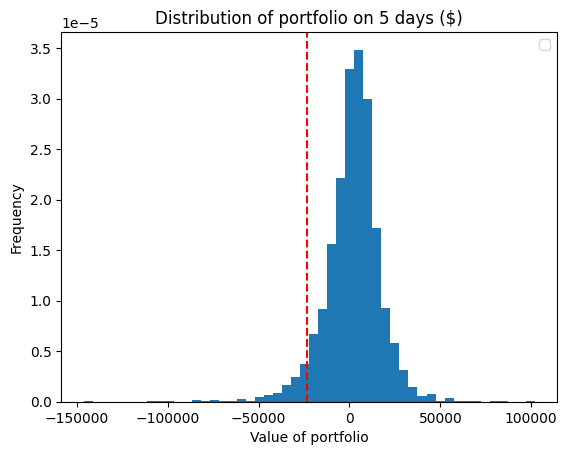

In [41]:
range_return_dollar = range_returns*portfolio_value

plt.hist(range_return_dollar.dropna(), bins = 50, density=True)
plt.xlabel("Value of portfolio")
plt.ylabel("Frequency")
plt.title(f"Distribution of portfolio on {days} days ($)")
plt.axvline(-VaR, color = 'r', linestyle = 'dashed')
plt.legend()
plt.show()
